# Проект: Исследование поведения пользователей сервиса аренды самокатов

**Цель проекта:** провести анализ данных популярного сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
**План работы:**
1. Подключить необходимые библиотеки для работы
2. Изучить общую информацию о наборе данных:
    - загрузить файлы
    - посмотреть количество данных, их тип, пропущенные значения
    - оценить распределение данных и сделать предварительные выводы о корректности данных
    - сделать вывод
3. Провести предварительную обработку данных:
    - переименовать столбцы в соответствии с правилами
    - заполнить пропуски
    - изменить тип данных
    - убрать явные и неявные дубликаты
    - изменить размерность столбцов (если это необходимо)
    - создать новые столбцы
    - сделать вывод
4. Провести исследовательский анализ данных:
    - Описать и визуализировать общую информацию о пользователях и поездках:
        - частота встречаемости городов;
        - соотношение пользователей с подпиской и без подписки;
        - возраст пользователей;
        - расстояние, которое пользователь преодолел за одну поездку;
        - продолжительность поездок.
    - сделать вывод
5. Объединить данные
6. Вычислить выручки по категориям пользователей
7. Проверить статистические гипотезы:
8. Решить задачи
9. Написать общий вывод
    
**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

In [63]:
#подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial, sqrt
from scipy import stats as st

#### Шаг 1. Загрузка данных

**Набор данных users**

In [64]:
try:
    users = pd.read_csv('data.csv')
except:
    users = pd.read_csv('https://dataset.csv')   

In [65]:
users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [66]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [67]:
users.duplicated().sum()

31

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

    
В датасете users 5 столбцов и 1565 строк, пропущенных значений нет. 3 столбца имеют тип данных object, 2 - int64. В наборе данных есть явные дубликаты. Удалим их

In [68]:
users = users.drop_duplicates()
print(users.duplicated().sum())
users.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


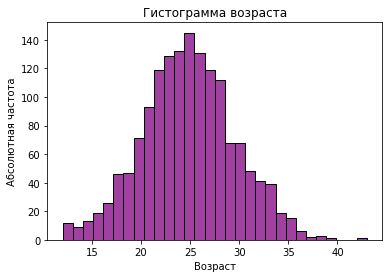

In [69]:
ax = sns.histplot(users['age'], color='purple')
ax.set(xlabel='Возраст', ylabel='Абсолютная частота', title='Гистограмма возраста');

**Набор данных rides**

In [70]:
try:
    rides = pd.read_csv('data.csv')
except:
    rides = pd.read_csv('https://dataset.csv')   

In [71]:
rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [72]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [73]:
rides.duplicated().sum()

0

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
В датасете rides 4 столбца и 18068 строк, пропущенных значений нет. 2 столбца имеют тип данных float64, 1 - int64, 1 - object. 
Столбец date с типом object нужно будет привести к типу данных даты. Явных дубликатов нет.

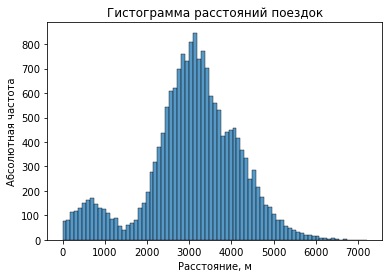

In [74]:
ax = sns.histplot(data=rides, x='distance')
ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма расстояний поездок');

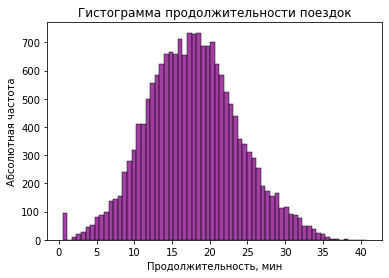

In [75]:
ax = sns.histplot(data=rides, x='duration', color='purple')
ax.set(xlabel='Продолжительность, мин', ylabel='Абсолютная частота', title='Гистограмма продолжительности поездок');

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
На гистограмме расстояние видно, что есть около 1000 пользователей, которые не проехали и метра, на гистограмме продолжительности поездок есть около 150 записей с нулевой продолжительности поездки.

**Набор данных subscriptions**

In [76]:
try:
    subscriptions = pd.read_csv('datacsv')
except:
    subscriptions = pd.read_csv('https://dataset.csv')   

In [77]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [78]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Набор данных subscriptions_go представляет собой сводную таблицу о типа подписках и ее характеристиках. Набор состоит из двух строк (двух типов подписки) и 4 столбцов. Дубликатов и пропущенных значений нет.

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">
Вывод:
    
У нас три набора данных. Пропущенных значений в них нет, явные дубликаты были удалены из таблицы users. В датасете rides нужно поменять тип данных у переменной date. 3-я таблица представляет справочную информацию. В таблице rides нужно посмотреть расстояние и продолжительность поездки поподробнее, там есть подозрение на аномальные данные.


#### Шаг 2. Предобработка данных

In [79]:
#меняем тип данных у переменной date в датасете rides
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [80]:
#создаем столбец с номером месяца
rides['month'] = rides['date']. dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [81]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [82]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Данные охватывают временной промежуток с 1 января 2021 по 30 декабря этого же года, поэтому добавлять столбец с годом не нужно.

In [83]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [84]:
users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Неявных дубликатов в названиях городов и именах пользователей нет.

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">Вывод:
    
    
Столбец date в таблице rides приведен к типу даты pandas. На его основе создан новый столбец с номером месяца. В таблицах нет  пропущенных значений и дубликатов.

    

#### Шаг 3. Исследовательский анализ данных

In [85]:
#частоты встречаемости городов
users['city'].value_counts().sort_values()

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

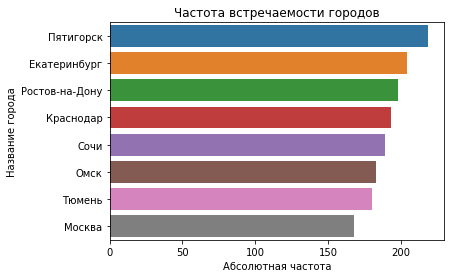

In [86]:
sns.countplot(y='city', data=users, order = users['city'].value_counts().index)
plt.title('Частота встречаемости городов')
plt.xlabel('Абсолютная частота')
plt.ylabel('Название города');

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Меньше всего пользователей из Москвы, больше всего - Пятигорск.

In [87]:
users['subscription_type'].value_counts()/users.shape[0]

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

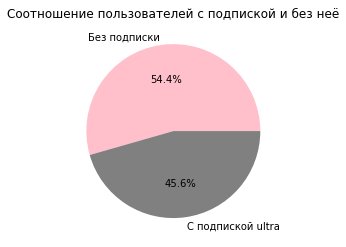

In [88]:
fig, ax = plt.subplots()
sizes = users['subscription_type'].value_counts()
labels = 'Без подписки', 'С подпиской ultra'
ax.pie(sizes, labels=labels, colors = ['pink', 'grey'], autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без неё');

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Пользователей без подписки на 9% больше, чем пользователей с подпиской.

In [89]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

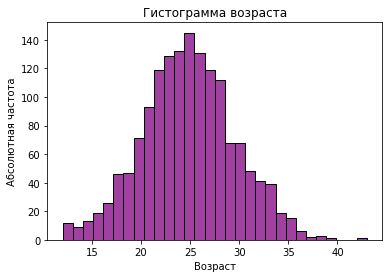

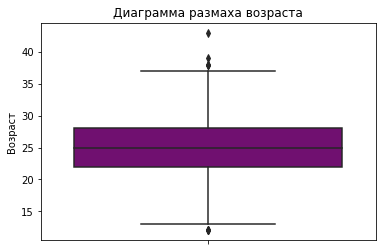

In [90]:
ax = sns.histplot(users['age'], color='purple')
ax.set(xlabel='Возраст', ylabel='Абсолютная частота', title='Гистограмма возраста');
plt.show()
sns.boxplot(data=users, y='age', color='purple')
plt.title('Диаграмма размаха возраста')
plt.ylabel('Возраст')
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Распределение данных по возрасту напоминает нормальное, это же подтверждается малой разницей между средним значением (24.9) и медианой (25). Судя по диаграмме размаха есть некоторое количество экстремальных значений, например, 12 лет и свыше 36. Не вижу смысла считать такие значения выбросами, так как такие данные могут быть реальны. Минимальный возраст клиентов 12 лет, максимальный - 43. Около 50% клиентов составляют возрастную группу от 22 до 28 лет. 

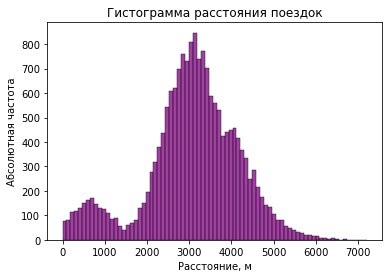

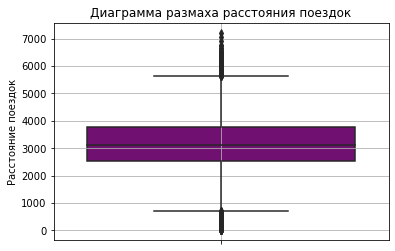

In [91]:
ax = sns.histplot(rides['distance'], color='purple')
ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма расстояния поездок');
plt.show()
sns.boxplot(data=rides, y='distance', color='purple')
plt.title('Диаграмма размаха расстояния поездок')
plt.ylabel('Расстояние поездок')
plt.grid(True)
plt.show()

In [92]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Для характеристики расстояния поездки воспользуемся медианой, так как на диаграмме размаха довольно большое количество выбросов. Медианное расстояние поездки - 3133 м, минимальное - меньше метра, максимальное свыше 7 км. 
Кроме того, на гистограмме два выраженных всплеска - смесь двух распределений: от 0 до 1500 м, и от 1500 м до 7300м. Это может быть вызвано тем, что в первом случае люди пользуются самокатом для того, чтобы попробовать / повеселиться. Во втором случае люди пользуются самокатом для быстрого перемещения по городу.

Посмотрим, как изменится медиана без выбросов.

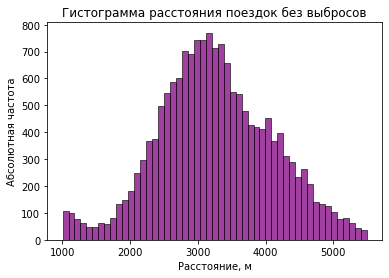

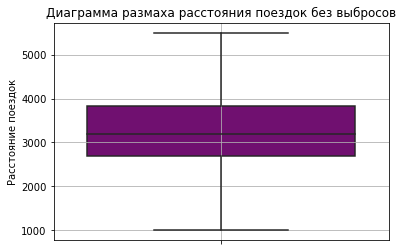

In [93]:
data = rides.loc[(rides['distance']>1000) & (rides['distance']<5500), ]
ax = sns.histplot(data['distance'], color='purple')
ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма расстояния поездок без выбросов');
plt.show()
sns.boxplot(data=data, y='distance', color='purple')
plt.title('Диаграмма размаха расстояния поездок без выбросов')
plt.ylabel('Расстояние поездок')
plt.grid(True)
plt.show()

In [94]:
(rides.shape[0] - data['distance'].count()) / rides.shape[0] * 100

8.534425503652866

In [95]:
rides.loc[(rides['distance']<1000), ]['distance'].count() / rides.shape[0] * 100

7.593535532433031

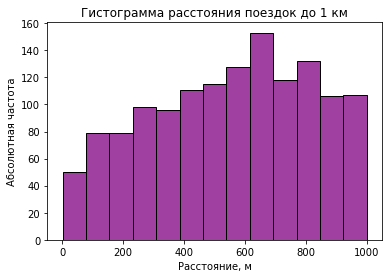

In [96]:
data = rides.loc[(rides['distance']<1000), ]
ax = sns.histplot(data['distance'], color='purple')
ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма расстояния поездок до 1 км');
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

В значения меньше 1 км и больше 5.5 км попадает 8.5% записей, при этом большая часть 7.6% приходится на дистанцию меньше 1км.

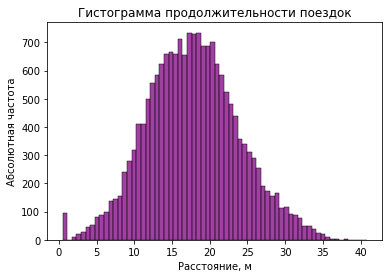

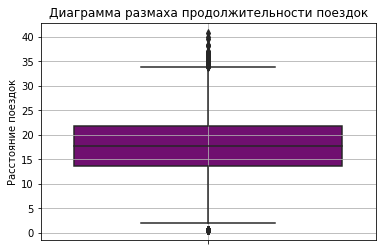

In [97]:
ax = sns.histplot(rides['duration'], color='purple')
ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма продолжительности поездок');
plt.show()
sns.boxplot(data=rides, y='duration', color='purple')
plt.title('Диаграмма размаха продолжительности поездок')
plt.ylabel('Расстояние поездок')
plt.grid(True)
plt.show()

In [98]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Минимальное время - полминуты, максимальное - 40 минут. Несмотря на наличиие выбросов, график похож на график нормального распределения, среднее значение и медиана имеют минимальное различие в значениях, 17.8 и 17.7, соответственно. 50% всех поездок длятся от 13.6 до 21.7 минут. Посмотрим, сколько имеется экстремальных значений.

In [99]:
(rides.shape[0] - rides.loc[(rides['duration']>2) & (rides['duration']<33), ]['duration'].count()) / rides.shape[0] * 100

1.333849900376356

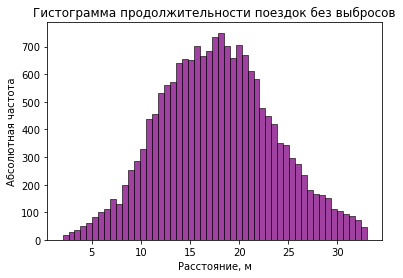

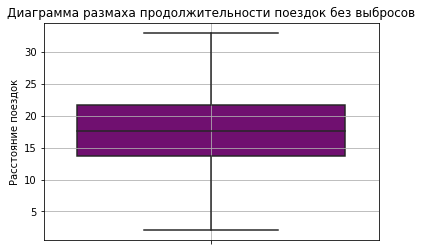

count    17827.000000
mean        17.761281
std          5.807972
min          2.035632
25%         13.637344
50%         17.651571
75%         21.627438
max         32.998485
Name: duration, dtype: float64

In [100]:
data = rides.loc[(rides['duration']>2) & (rides['duration']<33), ]

ax = sns.histplot(data['duration'], color='purple')
ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма продолжительности поездок без выбросов');
plt.show()
sns.boxplot(data=data, y='duration', color='purple')
plt.title('Диаграмма размаха продолжительности поездок без выбросов')
plt.ylabel('Расстояние поездок')
plt.grid(True)
plt.show()
data['duration'].describe()

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

В экстремальные значения попало чуть больше 1%. При этом среднее и медиана практически не изменились.

In [101]:
print('Коэффициент корреляции:',  round(rides['duration'].corr(rides['distance']), 2))

Коэффициент корреляции: 0.54


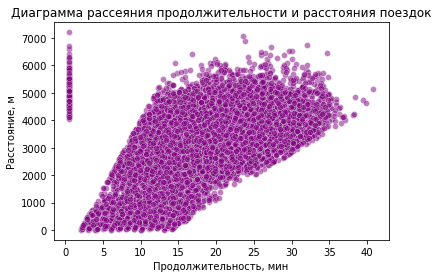

In [102]:
sns.scatterplot(data=rides, x='duration',  y='distance', alpha=0.5, color='purple')
plt.title('Диаграмма рассеяния продолжительности и расстояния поездок')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Расстояние, м');

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

На диаграмме рассеяния интересная зависимость: для продолжительности поездки 1-2 минуты расстояние поездки занимало от 4 до 7 км.

In [103]:
rides.loc[(rides['duration']<2), ]['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Таких записей 95.

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">
    Вывод:

Чаще всего среди городов клиентов встречается Пятигорск, реже - Москва. При этом пользователей без подписки всего на 9% больше, чем с подпиской. Возраст клиентов от 12 до 43 лет, в среднем это люди 25 лет. Около 50% клиентов составляют возрастную группу от 22 до 28 лет.
    
    
Медианное расстояние поездки - 3133 м, минимальное - меньше метра, максимальное свыше 7 км. Минимальное время поездки - полминуты, максимальное - 40 минут. Медианное время -  17.7 минут. 50% всех поездок длятся от 13.6 до 21.7 минут.
    
    
На диаграмме рассеяния для продолжительности и расстояния поездки видна интересная зависимость, для продолжительности поездки 1-2 минуты расстояние поездки занимало от 4 до 7 км. На это нужно обратить внимание заказчика, возможен сбой работы самокатов, геосистемы, обмана клиентами и др.Так как таких записей всего 95, я решила не убирать их из набора данных.


#### Шаг 4. Объединение данных

In [104]:
df = users.merge(rides, on='user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [105]:
df.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11


In [106]:
df = df.merge(subscriptions, on='subscription_type')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [107]:
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [108]:
print(df.shape[0] == rides.shape[0] or df.shape[0] == users.shape[0] or df.shape[0] == subscriptions.shape[0] )
print(df.shape[1] == rides.shape[1] + users.shape[1] + subscriptions.shape[1] - 2)

True
True


<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
После объединения таблиц количество записей новой таблице совпадает с количеством записей одной из таблиц (rides), количество столбцов также совпадает с суммой столбцов объединенных таблиц (за исключением повтора ключевых, по которым объединяем). Пропущенных значений нет. 

In [109]:
df_ultra = df.loc[df['subscription_type'] == 'ultra',]
df_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [110]:
df_free = df.loc[df['subscription_type'] == 'free',]
df_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [111]:
print(df_free.shape[0] + df_ultra.shape[0] == df.shape[0])
print(df_free.shape[1] == df.shape[1])
print(df_ultra.shape[1] == df.shape[1])

True
True
True


<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Количество столбцов в таблицах, полученных разделением по категориям из одного датафрейма, совпадает с количество столбцов исходного датафрейма. Сумма строк в новых датафреймах равна количеству строк исходного датафрейма.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


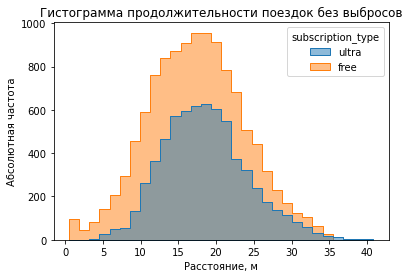

In [113]:
ax = sns.histplot(data = df, x='duration', hue='subscription_type', bins=30, alpha=0.5, element="step")

ax.set(xlabel='Расстояние, м', ylabel='Абсолютная частота', title='Гистограмма продолжительности поездок без выбросов');
plt.show()

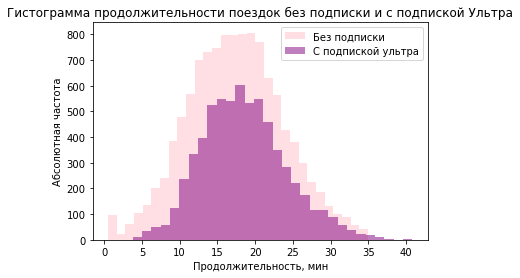

In [114]:
plt.hist(df_free['duration'], bins=30, alpha=0.5, label='Без подписки', color='pink')
plt.hist(df_ultra['duration'], bins=30, alpha=0.5, label='С подпиской ультра', color='purple')
plt.legend(loc='upper right')
plt.title('Гистограмма продолжительности поездок без подписки и с подпиской Ультра')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Абсолютная частота')
plt.show()

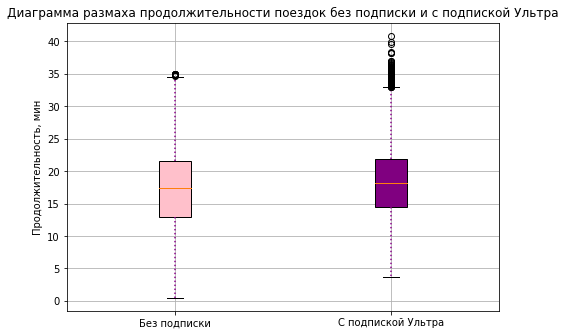

In [115]:
fig = plt.figure()
data = [df_free['duration'], df_ultra['duration']]
ax = fig.add_axes([0, 0, 1, 1])

colors = ['pink', 'purple']
bp = ax.boxplot(data, patch_artist = True,)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")    
plt.title('Диаграмма размаха продолжительности поездок без подписки и с подпиской Ультра')
ax.set_xticklabels(['Без подписки', 'С подпиской Ультра'])
plt.ylabel('Продолжительность, мин')
plt.grid(True)
plt.show()

In [116]:
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [117]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Минимальное время поездок у пользователей без подписки - 0.5 минуты, максимальное - 35 минут; минимальное время поездок у пользователей с подпиской - 3.7 минуты, максимальное - 41 минута. 

50% пользователей без подписки тратят на поездки от 13 до 21.6 минуты, с подпиской - от 14.5 до 22 минут.

Медианное время у пользователей без подписки - 17.3, с подпиской - 18.2 (берем медиану, так как по диаграмме размаха есть выбросы. Хотя среднее значение отличается на 0.1 и на 0.3 от медианы, соотвественно). Кроме того, отметим, что диаграмма размаха довольно симметричная. Гистограмма также напоминает график нормального распределения.



Минимальное время поездок у пользователей с подпиской - 3.7 минуты, максимальное - 41 минута. 50% пользователей тратят на поездки от 14.5 до 22 минут. Медианное время - 18.2 (берем медиану, так как по диаграмме размаха есть выбросы. Хотя среднее значение отличается от медианы всего лишь на 0.3). Кроме того, отметим, что диаграммы размаха довольно симметричные. Гистограммы также напоминает график нормального распределения. 

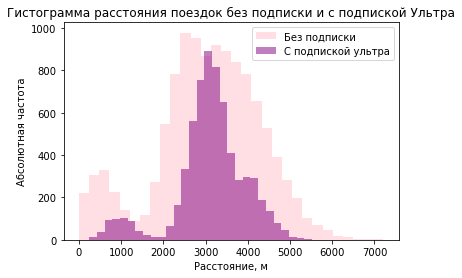

In [118]:
plt.hist(df_free['distance'], bins=30, alpha=0.5, label='Без подписки', color='pink')
plt.hist(df_ultra['distance'], bins=30, alpha=0.5, label='С подпиской ультра', color='purple')
plt.legend(loc='upper right')
plt.title('Гистограмма расстояния поездок без подписки и с подпиской Ультра')
plt.xlabel('Расстояние, м')
plt.ylabel('Абсолютная частота');

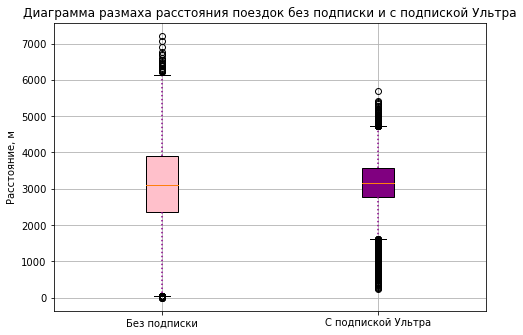

In [119]:
fig = plt.figure()
data = [df_free['distance'], df_ultra['distance']]
ax = fig.add_axes([0, 0, 1, 1])

colors = ['pink', 'purple']
bp = ax.boxplot(data, patch_artist = True,)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")    
plt.title('Диаграмма размаха расстояния поездок без подписки и с подпиской Ультра')
ax.set_xticklabels(['Без подписки', 'С подпиской Ультра'])
plt.ylabel('Расстояние, м')
plt.grid(True)
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Минимальное расстояние поездок у пользователей без подписки - 0.8 метра, максимальное - 7.2 км; у пользователей с подпиской: минимальное - 244 метра, максимальное - 5.7 км.


50% пользователей без подписки проезжают от 2.4 до 3.9 км, с подпиской - от 2.8 до 3.6 км.


Медианное расстояние у пользователей обеих категорий совпадает - 3.1 км (берем медиану, так как по диаграмме размаха есть выбросы). 

Кроме того, отметим, что диаграммы размаха довольно симметричная. Гистограммы напоминают смесь двух гистограмм нормального распределения: от 0 до 2 кмм и свыше 2км.


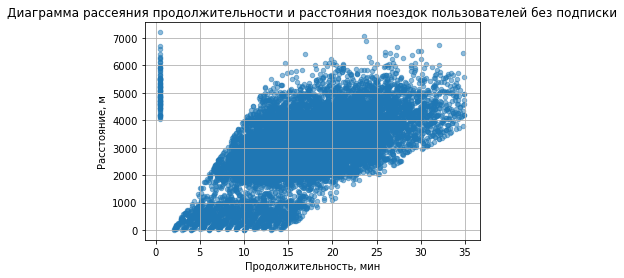

Коэффициент корреляции: 0.56


In [120]:
df_free.plot(x='duration',  y='distance',  kind='scatter', grid=True, alpha=0.5)
plt.title('Диаграмма рассеяния продолжительности и расстояния поездок пользователей без подписки')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Расстояние, м')
plt.show()
print('Коэффициент корреляции:',  round(df_free['duration'].corr(df_free['distance']), 2))

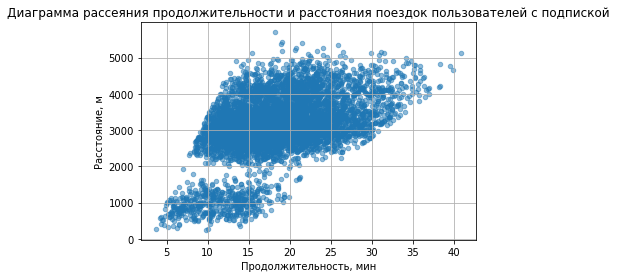

Коэффициент корреляции: 0.49


In [121]:
df_ultra.plot(x='duration',  y='distance',  kind='scatter', grid=True, alpha=0.5)
plt.title('Диаграмма рассеяния продолжительности и расстояния поездок пользователей с подпиской')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Расстояние, м')
plt.show()
print('Коэффициент корреляции:',  round(df_ultra['duration'].corr(df_ultra['distance']), 2))

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Именно для пользователей без подписки характерна аномальная взаимосвязь, для продолжительности поездки менее 2 минут расстояние в пределах от 4 до 7 км.

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">
    Вывод:
    
Все три таблицы были объединены в одну. Таблицы users и rides были объединены по столбцу user_id, получившая таблица была объединена с таблицей subscription по столбцу subscription_type. Были созданы еще 2 таблицы для пользователей с подпиской и без нее. Объединение и разбиение произведено корректно.
    
Экстремальные значение продолжительности поездок у пользователей с подпиской и без нее различается: минимальное время 3.7 минуты и 0.5 минуты, максимальное - 41 минуты и 35 минут, соответственно. Медианное время также отличается: у пользователей с подпиской оно больше: 18.2 против 17.3 минуты у пользователей без подписки. 

Экстремальные значения расстояния также отличаются. У пользователей с подпиской: минимальное 244 метра, максимальное - 5.7 км, без подписки: минимальное - 0.8 метра, максимальное - 7.2 км. Тем не менее медианное расстояние совпадает - 3.1 км.

#### Шаг 5. Подсчёт выручки

In [122]:
df['duration'] = np.ceil(df['duration']) 
df['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

In [123]:
df.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16.0,2021-11-22,11,6,0,199


In [124]:
travels = df.groupby(['user_id','month'])\
            .agg({'distance':'sum', 
                  'user_id':'count', 
                  'duration':'sum', 
                  'subscription_type': 'min',
                  'minute_price': 'min',
                  'start_ride_price': 'min',
                  'subscription_fee': 'min'
                 })
travels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           11331 non-null  float64
 1   user_id            11331 non-null  int64  
 2   duration           11331 non-null  float64
 3   subscription_type  11331 non-null  object 
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 665.0+ KB


In [125]:
travels = travels.rename(columns={'distance':'distance_sum', 
                        'user_id': 'travels_count', 
                        'duration': 'duration_sum'})
travels.head(20)
travels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance_sum       11331 non-null  float64
 1   travels_count      11331 non-null  int64  
 2   duration_sum       11331 non-null  float64
 3   subscription_type  11331 non-null  object 
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 665.0+ KB


In [126]:
travels.reset_index(inplace= True )
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   distance_sum       11331 non-null  float64
 3   travels_count      11331 non-null  int64  
 4   duration_sum       11331 non-null  float64
 5   subscription_type  11331 non-null  object 
 6   minute_price       11331 non-null  int64  
 7   start_ride_price   11331 non-null  int64  
 8   subscription_fee   11331 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 796.8+ KB


In [127]:
travels.head(20)

,user_id,month,distance_sum,travels_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42.0,ultra,6,0,199
1,1,4,754.159807,1,7.0,ultra,6,0,199
2,1,8,6723.470560,2,46.0,ultra,6,0,199
3,1,10,5809.911100,2,32.0,ultra,6,0,199
4,1,11,7003.499363,3,56.0,ultra,6,0,199
5,1,12,6751.629942,2,28.0,ultra,6,0,199
6,2,3,10187.723006,3,63.0,ultra,6,0,199
7,2,4,6164.381824,2,40.0,ultra,6,0,199
8,2,6,3255.338202,1,14.0,ultra,6,0,199
9,2,7,6780.722964,2,48.0,ultra,6,0,199


In [128]:
#функция для подсчёта выручки
def money(row):   
    return row['start_ride_price'] * row['travels_count'] + row['minute_price'] * row['duration_sum'] + row['subscription_fee']

In [129]:
travels['profit_month'] = travels.apply(money, axis=1)
travels.head(10)

,user_id,month,distance_sum,travels_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,profit_month
0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
1,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
2,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0
3,1,10,5809.911100,2,32.0,ultra,6,0,199,391.0
4,1,11,7003.499363,3,56.0,ultra,6,0,199,535.0
5,1,12,6751.629942,2,28.0,ultra,6,0,199,367.0
6,2,3,10187.723006,3,63.0,ultra,6,0,199,577.0
7,2,4,6164.381824,2,40.0,ultra,6,0,199,439.0
8,2,6,3255.338202,1,14.0,ultra,6,0,199,283.0
9,2,7,6780.722964,2,48.0,ultra,6,0,199,487.0


<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">Вывод:
    
Был создан датафрейм с агрегированными данными о поездках со столбцами суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, помесячной выручкой.

#### Шаг 6. Проверка гипотез

*6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.*

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

**Нулевая гипотеза:** пользователи с подпиской и пользователи без подписки тратят в среднем одинаковое время на поездки.


**Альтернативная гипотеза:** пользователи с подпиской тратят больше времени в среднем на поездки, чем пользователи без подписки.


Для проверки гипотезы воспользуется односторонним t-тестом Стьюдента для двух независимых выборки на уровне значимости 0.01. 

In [130]:
print(df_ultra.shape[0])
print(df_free.shape[0])
df_free.shape[0] / df_ultra.shape[0]
print('Минимальное: ', round(df_ultra['duration'].min(), 2), 
      'максимальное: ', round(df_ultra['duration'].max(), 2), 
      'стандартное отклонение: ', round(df_ultra['duration'].std(), 2))
print('Минимальное: ', round(df_free['duration'].min(), 2), 
      'максимальное: ', round(df_free['duration'].max(), 2),
     'стандартное отклонение: ', round(df_free['duration'].std(), 2))

(round(df_free['duration'].std(), 2) - round(df_ultra['duration'].std(), 2)) / round(df_free['duration'].std(), 2) * 100

6500
11568
Минимальное:  3.76 максимальное:  40.82 стандартное отклонение:  5.57
Минимальное:  0.5 максимальное:  34.95 стандартное отклонение:  6.33


12.006319115323851

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">
Поскольку сравниваемые выборки различаются размером (в 1.8 раза), категории пользователей разные (с подпиской и без), размах значений у них разный, стандартное отклонение различается на 12%, я возьму критерий без предположения о равенстве дисперсий.

In [131]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_ultra['duration'], df_free['duration'], alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

Получили очень маленькое p-значение, то есть вероятность получить такие значения при верной нулевой гипотезы, очень мала. Поэтому мы отвергаем нулевую гипотезу и не отклоняем альтернативную на уровне значимости 0.01. Другими словами, пользователи с подпиской тратят больше времени на поездки.

*6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.*

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

**Нулевая гипотеза:** пользователи с подпиской за одну поездку в среднем проезжают 3130 метров.

**Альтернативная гипотеза:** пользователи с подпиской за одну поездку проезжают больше 3130 метров.

Для проверки гипотезы воспользуется односторонним t-тестом Стьюдента для одной выборки на уровне значимости 0.01.

In [132]:
alpha = 0.051 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_1samp(df_ultra['distance'], 3130, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">
    
p-значение: 0.9 > 0.01, значит, нулевую гипотезу нельзя отвергать, то есть пользователи с подпиской за одну поездку в среднем проезжают 3130 метров. К слову, это и медианное значение выборки. То есть среднее расстояние в пределах нормы, а, значит, самокаты не будут сильно изнашиваться.

*6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.*

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

**Нулевая гипотеза:** средняя помесячная выручка от пользователей с подпиской по месяцам не отличается от выручки от пользователей без подписки.

**Альтернативная гипотеза:** средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Для проверки гипотезы воспользуется односторонним t-тестом Стьюдента для двух независимых выборки на уровне значимости 0.01.

In [133]:
print(df_ultra.shape[0])
print(df_free.shape[0])
df_free.shape[0] / df_ultra.shape[0]
print('Минимальное: ', round(travels.loc[ travels['subscription_type'] == 'ultra','profit_month'].min(), 2), 
      'максимальное: ', round(travels.loc[ travels['subscription_type'] == 'ultra','profit_month'].max(), 2), 
      'стандартное отклонение: ', round(travels.loc[ travels['subscription_type'] == 'ultra','profit_month'].std(), 2))
print('Минимальное: ', round(travels.loc[ travels['subscription_type'] == 'free','profit_month'].min(), 2), 
      'максимальное: ', round(travels.loc[ travels['subscription_type'] == 'free','profit_month'].max(), 2),
     'стандартное отклонение: ', round(travels.loc[ travels['subscription_type'] == 'free','profit_month'].std(), 2))

(round(travels.loc[ travels['subscription_type'] == 'free','profit_month'].std(), 2) - round(travels.loc[ travels['subscription_type'] == 'ultra','profit_month'].std(), 2)) / round(travels.loc[ travels['subscription_type'] == 'free','profit_month'].std(), 2) * 100

6500
11568
Минимальное:  223.0 максимальное:  955.0 стандартное отклонение:  88.26
Минимальное:  58.0 максимальное:  1444.0 стандартное отклонение:  183.87


51.998694729972264

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Поскольку сравниваемые выборки различаются размером (в 1.8 раза), категории пользователей разные (с подпиской и без), размах значений у них разный, стандартное отклонение различается на 52%, я возьму критерий без предположения о равенстве дисперсий.

In [134]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(travels.loc[ travels['subscription_type'] == 'ultra','profit_month'], 
                       travels.loc[ travels['subscription_type'] == 'free','profit_month'], 
                       alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

Получили очень маленькое p-значение, то есть вероятность получить такие значения при верной нулевой гипотезы, очень мала. Поэтому мы отвергаем нулевую гипотезу и не отклоняем альтернативную на уровне значимости 0.01. Другими словами, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

*6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

Поскольку одна и та же переменная (количество обращений в техподдержку) измеряется на одной и той же выборки, то нужно воспользоваться t-тестом Стьюдента для зависимых выборок. Поскольку важно узнать именно, снизилось ли значение, то нужно воспользоваться односторонним критерием.

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

**Вывод:**
    
Статистические критерии подтверждают что:
* пользователи с подпиской тратят больше времени на поездки.
* пользователи с подпиской за одну поездку в среднем проезжают 3130 метров.
* помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


#### Шаг 7. Распределения

*7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.*

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Так как в эксперименте, продлит ли клиент подписку возможно только 2 исхода: или продлит, или нет, то это эксперимент Бернулли. Так как у нас не один клиент, а несколько независимых клиентов - то это схема Бернулли, или биномиальное распределение. Вероятность успеха p = 0.1, следовательно, вероятность неудачи q = 1 - p = 0.9.

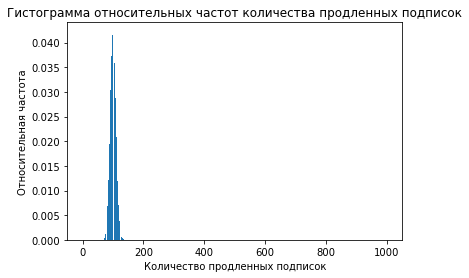

In [135]:
p = 0.1
n = 1000

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1-p)**(n-k) 
    distr.append(prob)
       
plt.bar(range(0, n + 1), distr)
plt.title('Гистограмма относительных частот количества продленных подписок')
plt.xlabel('Количество продленных подписок')
plt.ylabel('Относительная частота');

In [136]:
# задаём параметры биномиального распределения
n = 1160
p = 0.1

distr = st.binom(n, p) 
# считаем вероятность хвоста слева от 100
result = distr.cdf(99)
print(result)

0.0507443655394362


<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

При раздаче 1160 промокодов вероятность не выполнить план о продлении подписки 100 клиентов меньше 5%.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Чтобы рассчитать минимальное количество промокодов, лучше в цикле выбрать какое-нибудь количество промокодов (n) и увеличивать его на единицу, пока binom.cdf не станет равным или меньше 0.05 (в аргументах функции cdf стоит указать 99, n и p). 

*Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.*

<div class="alert alert-info"  style="border-radius: 15px; border: 1px solid ">

Так как в эксперименте возможно только 2 исхода: клиент может открыть уведомление или нет, то это эксперимент Бернулли. Так как у нас не один клиент, а несколько независимых клиентов - то это схема Бернулли, или биномиальное распределение. Вероятность успеха p = 0.4, следовательно, вероятность неудачи q = 1 - p = 0.6. Так как n очень велико, а вероятность успеха близка к 0.5, то это распределение можно аппроксимировать нормальным распределением. 

In [137]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(399500)
print(result)


0.15371708296369768


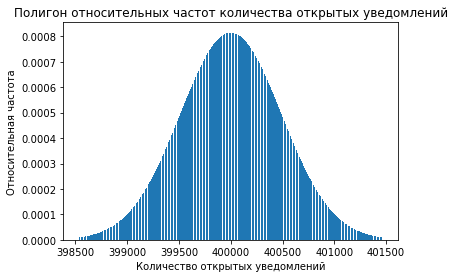

In [138]:
n = 1000000
p = 0.4

lst = []

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

for k in range(int(mu-3*sigma), int(mu + 3*sigma)):
    lst.append(distr.pdf(k))

plt.bar(range(int(mu-3*sigma), int(mu + 3*sigma)), lst)
plt.title('Полигон относительных частот количества открытых уведомлений')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Относительная частота');

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей, равна 15.4%.

<div class="alert alert-success"  style="border-radius: 15px; border: 1px solid ">

**Вывод:** 
1. Для анализа был предоставлена 3 набора данных. В датасете users 5 столбцов и 1565 строк, пропущенных значений нет. 3 столбцы имеют тип данных object, 2 - int64.  В наборе данных есть явные дубликаты. В датасете rides 4 столбца и 18068 строк, пропущенных значений нет. 2 столбца имеют тип данных float64, 1 - int64, 1 - object. Столбец object нужно будет привести к типу данных даты. Явных дубликатов нет. Набор данных subscriptions_go представляет собой сводную таблицу о типа подписках и ее характеристиках. Набор состоит из двух строк (двух типов подписки) и 4 столбцов. Дубликатов и пропущенных значений нет. В ходе исследования были намечены столбцы для изменения типа данных, а также выявлены столбцы с аномальными значениями.
2. На этапе предобработки данных были изменены типы данных столбцов, добавлены новые. Явные дубликаты были удалены, неявных дубликтов нет.
3. Исследовательский анализ данных показал, что чаще всего среди городов клиентов встречается Пятигорск, реже - Москва. При этом пользователей без подписки всего на 9% больше, чем с подпиской. Возраст клиентов от 12 до 43 лет, в среднем это люди 25 лет. Около 50% клиентов составляют возрастную группу от 22 до 28 лет. Медианное расстояние поездки - 3133 м, минимальное - меньше метра, максимальное свыше 7 км. Кроме того, на гистограмме расстояния поездки два выраженных всплеска - смесь двух распределений: от 0 до 1500 м, и от 1500 м до 7300м. Это может быть вызвано тем, что в первом случае люди пользуются самокатом для того, чтобы попробовать / повеселиться. Во втором случае люди пользуются самокатом для быстрого перемещения по городу. Минимальное время поездки - полминуты, максимальное - 40 минут. Медианное время -  17.7 минут. 50% всех поездок длятся от 13.6 до 21.7 минут. На диаграмме рассеяния для продолжительности и расстояния поездки видна интересная зависимость, для продолжительности поездки 1-2 минуты расстояние поездки занимало от 4 до 7 км. На это нужно обратить внимание заказчика, возможен сбой работы самокатов, геосистемы, обмана клиентами и др. Эти данные было решено не удалять.
4. Все три таблицы были объединены в одну. Таблицы users и rides были объединены по столбцу user_id, получившая таблица была объединена с таблицей subscription по столбцу subscription_type. Были созданы еще 2 таблицы для пользователей с подпиской и без нее. Все объединения и разбиения таблиц были проведены корректно. Экстремальные значение продолжительности поездок у пользователей с подпиской и без нее различается: минимальное время 3.7 минуты и 0.5 минуты, максимальное - 41 минуты и 35 минут, соответственно. Медианное время также отличается: у пользователей с подпиской оно больше: 18.2 против 17.3 минуты у пользователей без подписки. Экстремальные значения расстояния также отличаются. У пользователей с подпиской: минимальное 244 метра, максимальное - 5.7 км, без подписки: минимальное - 0.8 метра, максимальное - 7.2 км. Тем не менее медианное расстояние совпадает - 3.1 км.
5. Был создан датафрейм с агрегированными данными о поездках со столбцами суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, помесячной выручкой.
6. Статистические критерии подтверждают что:
* пользователи с подпиской тратят больше времени на поездки.
* пользователи с подпиской за одну поездку в среднем проезжают 3130 метров, а, значит, среднее расстояние в пределах нормы, и самокаты не будут сильно изнашиваться.
* помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, поэтому пользователи с подпиской более выгодня для сервиса аренды самокатов.
    
    Пользователи с подпиской выгоднее.
7. При раздаче 1160 промокодов вероятность не выполнить план о продлении подписки 100 клиентов меньше 5%. Вероятность того, что уведомление откроют не более 399.5 тыс. пользователей из 1 млн, равна 15.4%.

